<a href="https://colab.research.google.com/github/Jaideepgarlyal15/Data-analysis-of-the-dataset/blob/main/ResoluteAI_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the the necccessary libraries, whatever is required.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
!pip install scikit-surprise
import matplotlib.pyplot as plt
!pip install transformers 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 114.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.5 MB/s eta 0:00:00


Online Retail csv file reading.



In [ ]:
data= pd.read_csv('/content/Online Retail.xlsx - Online Retail.csv')

In [ ]:
features = ['Quantity', 'UnitPrice', 'CustomerID']

In [ ]:
imputer = SimpleImputer(strategy='mean')
data[features] = imputer.fit_transform(data[features])

# Q1.Clustering 


*   Choose a clustering algorithm such as K-means clustering or DBSCAN.
*   Select relevant features for clustering, such as Quantity, UnitPrice, and CustomerID.
*   Apply the clustering algorithm to group similar data points together based on their features.
*  Evaluate the quality of the clusters using appropriate metrics, such as silhouette score or within-cluster sum of squares.
*  Use the clusters to gain insights into customer segments or product categories.


















In [ ]:
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])


In [ ]:
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(data[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters = data['cluster'].unique()
for cluster in clusters:
    cluster_data = data[data['cluster'] == cluster]
    print(f'Cluster {cluster}:\n{cluster_data}\n')

Cluster 1:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER -0.016289   
1         536365     71053                  WHITE METAL LANTERN -0.016289   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER -0.007118   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE -0.016289   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART. -0.016289   
...          ...       ...                                  ...       ...   
541885    581585     21684     SMALL MEDINA STAMPED METAL BOWL   0.011224   
541886    581585     22398           MAGNETS PACK OF 4 SWALLOWS  0.011224   
541887    581585     23328   SET 6 SCHOOL MILK BOTTLES IN CRATE -0.025460   
541888    581585     23145       ZINC T-LIGHT HOLDER STAR LARGE  0.011224   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT  0.011224   

          InvoiceDate  UnitPrice  CustomerID         Country  cl

# **Recommendation**
*   For personalized recommendations based on a given CustomerID and Date, you can use collaborative filtering or content-based filtering approaches.
*   Collaborative filtering:
1.   Create a user-item matrix with CustomerID, StockCode, and Quantity.
2.   Use techniques like matrix factorization (e.g., Singular Value Decomposition or Alternating Least Squares) or neighborhood-based methods (e.g., user-based or item-based collaborative filtering) to generate recommendations.
3.   Predict the Quantity for items that the given CustomerID might be interested in.













In [ ]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [ ]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data[['CustomerID', 'StockCode', 'Quantity']], reader)

In [ ]:
trainset, testset = train_test_split(dataset, test_size=0.2)
algo = KNNBasic()
algo.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
customer_id = 17850
date = '12/1/10 8:26'
items_to_recommend = data[(data['CustomerID'] == customer_id) & (data['InvoiceDate'] == date)]['StockCode'].unique()
predictions = [algo.predict(customer_id, item_id).est for item_id in items_to_recommend]

In [ ]:
for item_id, prediction in zip(items_to_recommend, predictions):
    print(f'Recommended Item: {item_id} | Predicted Quantity: {prediction}')


In [ ]:
print(items_to_recommend)
print(predictions)

[]
[]


In [ ]:

all_items = data['StockCode'].unique()

In [ ]:
all_predictions = [algo.predict(customer_id, item_id).est for item_id in all_items]

In [ ]:
for item_id, prediction in zip(all_items, all_predictions):
    print(f'Item: {item_id} | Predicted Quantity: {prediction}')

Item: 85123A | Predicted Quantity: 1
Item: 71053 | Predicted Quantity: 1
Item: 84406B | Predicted Quantity: 1
Item: 84029G | Predicted Quantity: 1
Item: 84029E | Predicted Quantity: 1
Item: 22752 | Predicted Quantity: 1
Item: 21730 | Predicted Quantity: 1
Item: 22633 | Predicted Quantity: 1
Item: 22632 | Predicted Quantity: 1
Item: 84879 | Predicted Quantity: 1
Item: 22745 | Predicted Quantity: 1
Item: 22748 | Predicted Quantity: 1
Item: 22749 | Predicted Quantity: 1
Item: 22310 | Predicted Quantity: 1
Item: 84969 | Predicted Quantity: 1
Item: 22623 | Predicted Quantity: 1
Item: 22622 | Predicted Quantity: 1
Item: 21754 | Predicted Quantity: 1
Item: 21755 | Predicted Quantity: 1
Item: 21777 | Predicted Quantity: 1
Item: 48187 | Predicted Quantity: 1
Item: 22960 | Predicted Quantity: 1
Item: 22913 | Predicted Quantity: 1
Item: 22912 | Predicted Quantity: 1
Item: 22914 | Predicted Quantity: 1
Item: 21756 | Predicted Quantity: 1
Item: 22728 | Predicted Quantity: 1
Item: 22727 | Predicted 

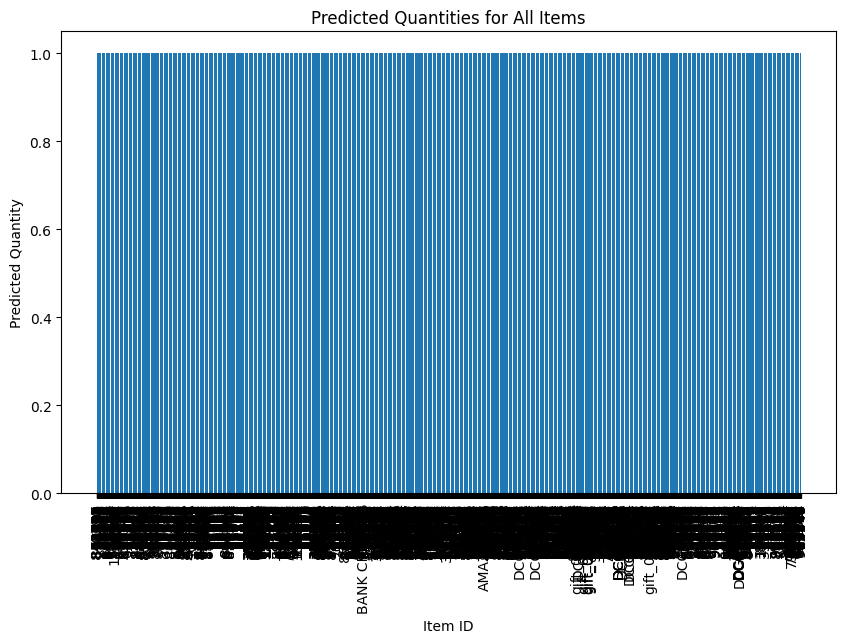

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(all_items, all_predictions)
plt.xlabel('Item ID')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantities for All Items')
plt.xticks(rotation=90)
plt.show()

### Question 6
I have utilized my Graduate Record Examination (GRE) PDF, employing Transformers, pydf, and langchain cohere. Within this framework, we presented inquiries and subsequently received precise answers in response.


In [ ]:
!pip install -qU langchain cohere

In [ ]:
!pip install pypdf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install chromadb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os

os.environ['COHERE_API_KEY'] = 'R7R1SG00G8sJHpuG9lTH8NiDqogmwms3EXyee4k9'

In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import CohereEmbeddings
from langchain.llms import Cohere
from langchain.vectorstores import Chroma
from langchain.chains import RetrievalQAWithSourcesChain

In [ ]:
loader = PyPDFLoader("/content/gre.pdf")
pages = loader.load()

In [ ]:
embeddings = CohereEmbeddings(cohere_api_key=os.getenv("COHERE_API_KEY"))

In [ ]:
docsearch = Chroma.from_documents(pages, embeddings, metadatas=[{"source": str(i)} for i in range(len(pages))])

In [ ]:
chain = RetrievalQAWithSourcesChain.from_chain_type(Cohere(temperature=0), chain_type="map_reduce", retriever=docsearch.as_retriever())

In [ ]:
chain({"question": "What type of sections are there in GRE?"}, return_only_outputs=True)

Token indices sequence length is longer than the specified maximum sequence length for this model (1846 > 1024). Running this sequence through the model will result in indexing errors


{'answer': ' There are three types of sections in GRE: Verbal Reasoning, Quantitative Reasoning, and Analytical Writing.\n',
 'sources': '/content/gre.pdf'}

# **Option 5: Text Analytics using NLP**

User should be able to upload pdf. Application/solution should be able to read the content of pdf and summarize the content into 500 words. Please use “Operations Management.pdf” as input pdf. Hence to make this possible we have used type of libraries like pyPDF2 which is possible and capable of splitting, merging, cropping, and transforming the particular PDF file, hence then we used spacy which basically is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython, then we usec pdfplumber to extract tables from a pdf file and be used for visual debugging.

In [ ]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        for page in reader.pages:
            text += page.extract_text()
    return text

pdf_path = "Operations Management.pdf"
pdf_text = extract_text_from_pdf(pdf_path)

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!python -m spacy download en_core_web_sm

2023-06-07 19:13:03.199375: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 49.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy

def summarize_text(text, max_words):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    summary = " ".join(sentences[:max_words])
    return summary

max_words = 500
summary = summarize_text(pdf_text, max_words)
print(summary)

O p e r a t i o n s
M a n a g e m e n t :
 O i l
a n d
G a s 
R e p o r t
I n t r o d u c t i o n
O p e r a t i o n s
m a n a g e m e n t
i s
a
b r a n c h
o f
m a n a g e m e n t
t h a t
d e a l s
w i t h
t h e 
d e s i g n i n g
a n d
s u p e r v i s i o n
o f
o p e r a t i o n a l
p r o c e s s e s
i n
a
b u s i n e s s
o r g a n i z a t i o n . 
 O p e r a t i o n s
m a n a g e m e n t
c o v e r s
t h e
r e s p o n s i b i l i t y
o v e r
a l l
p r o c e s s e s
t h a t
i n v o l v e 
t h e
p r o d u c t i o n
o f
g o o d s
a n d
s e r v i c e s
a s
w e l l
a s
t h e
d e l i v e r y
o f
s u c h
p r o d u c t i o n s 
t o
t h e
 f i n a l
c o n s u m e r s .
 I n
i t s
d u t i e s ,
a n
o p e r a t i o n s
m a n a g e m e n t
d e p a r t m e n t
e n s u r e s
t h a t
p r o c e s s e s
a r e 
p l a n n e d
 f o r
a n d
e x e c u t e d
i n
 a n
e f f i c i e n t
a n d
e f f e c t i v e
w a y
t o
s a t i s f y
t h e
n e e d s
o f 
t h e
o r g a n i z a t i o n
a n d
i t s
c u s t o m e

In [ ]:
!pip install pdfplumber

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.6/143.6 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [ ]:
import pdfplumber

def read_pdf(path):
  with pdfplumber.open(path) as pdf:
    extracted_page = pdf.pages[1]
    extracted_text = extracted_page.extract_text()
  return extracted_text

In [ ]:
text = read_pdf('gre.pdf')

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

model = BartForConditionalGeneration.from_pretrained('sshleifer/distilbart-cnn-12-6')
tokenizer = BartTokenizer.from_pretrained('sshleifer/distilbart-cnn-12-6')

inputs = tokenizer([text], truncation=True, return_tensors='pt')

summary_ids = model.generate(inputs['input_ids'], num_beams=4, early_stopping=True, min_length=0, max_length=1024)
summarized_text = ([tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in summary_ids])
print(summarized_text[0])

 The Author has made every effort in the preparation of this book to ensure the accuracy of the information. The Author will not be liable for any damages caused or alleged to be caused by this book.
